In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

$$\hat{y} = \frac{1}{1+ \exp{(-u)}} $$
$$ u = wx+b$$
$$ C = S + Z$$
$$ S = y\log(\hat{y})$$
$$ Z = (1-y).\log(1-\hat{y})$$

## Updating parameters

$\frac{\partial u}{\partial \hat{y}}$ = $-x$

$\frac{\partial u}{\partial b}$ = $1$

$\frac{\partial \hat{y}}{\partial u}$ = $\frac{\exp (u)}{1+\exp(u)^2}$ $= \hat{y}(1-\hat{y})$

$\frac{\partial C}{\partial \hat{y}}$ = $\frac{-y}{\hat{y}} + \frac{1-y}{1-\hat{y}}$ $ =\frac{-y + \hat{y}} {\hat{y}(1-\hat{y})}$

## Derive $\frac{\partial C}{\partial m}$ and $\frac{\partial C}{\partial b}$

$\frac{\partial C}{\partial b}$ = $\frac{\partial C}{\partial \hat{y}}$ $\frac{\partial  \hat{y}}{\partial u}$ $\frac{\partial  u}{\partial b}$ $= (\hat{y} - y)$

$\frac{\partial C}{\partial m}$ = $\frac{\partial C}{\partial \hat{y}}$ $\frac{\partial  \hat{y}}{\partial u}$ $\frac{\partial  u}{\partial m}$ $= (\hat{y} - y)x$

In [9]:
X, y = make_classification(n_samples = 100, n_features = 1, n_informative = 1,n_redundant = 0, n_clusters_per_class = 1, random_state = 42)

In [10]:
X = X.flatten()

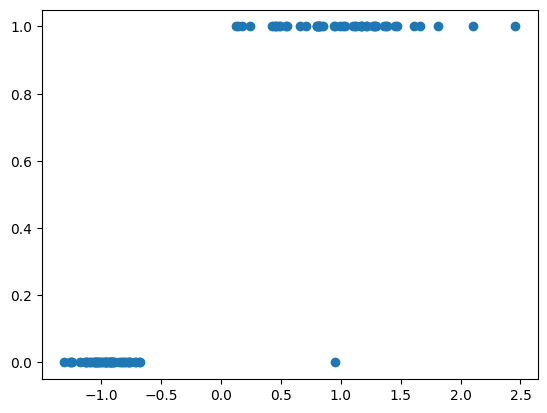

In [11]:
plt.scatter(X, y)

In [12]:
def regression(my_x, my_m, my_b):
  return my_m * my_x + my_b

def sigmoid(r):
  return 1/(1+np.exp(-r))

def gradient_descent(L, m_now, b_now, my_y, my_x):
    n = len(my_y)
    yhat = sigmoid(regression(my_x, m_now, b_now))
    m_gradient = (1/n) * np.sum(my_x * (yhat - my_y))
    b_gradient = (1/n) * np.sum(yhat - my_y)
    m = m_now - L * m_gradient
    b = b_now - L * b_gradient
    return m, b

In [13]:
epochs = 10000
L = 0.1
m = 0
b = 0
for epoch in range(epochs):
  y_hat = regression(X, m, b)
  cost = log_loss(y, y_hat)
  m, b = gradient_descent(L, m, b, y, X)

  print(f'Cost: {cost}, m: {m}, b: {b}')

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Cost: 0.3607275229081193, m: 5.2682804726006305, b: 0.2843653961880568
Cost: 0.3607274708772763, m: 5.268316790051216, b: 0.28436571079483797
Cost: 0.36072741888413956, m: 5.268353083836668, b: 0.28436602485408513
Cost: 0.360727366928679, m: 5.268389353973079, b: 0.2843663383665771
Cost: 0.36072731501086436, m: 5.268425600476534, b: 0.28436665133309164
Cost: 0.36072726313066555, m: 5.268461823363102, b: 0.2843669637544055
Cost: 0.3607272112880523, m: 5.268498022648843, b: 0.28436727563129444
Cost: 0.36072715948299455, m: 5.268534198349802, b: 0.2843675869645331
Cost: 0.3607271077154622, m: 5.268570350482015, b: 0.2843678977548952
Cost: 0.36072705598542515, m: 5.268606479061506, b: 0.28436820800315327
Cost: 0.3607270042928533, m: 5.2686425841042865, b: 0.284368517710079
Cost: 0.36072695263771676, m: 5.268678665626355, b: 0.2843688268764429
Cost: 0.36072690101998556, m: 5.2687147236437015, b: 0.2843691355030145

In [20]:
print(f'm:{m}, b:{b}')

m:5.322799050486274, b:0.28443277769036296


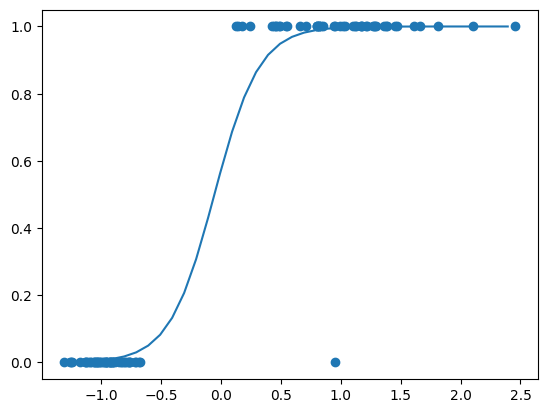

In [14]:
x_vals = np.arange(X.min(), X.max(), 0.1)
r = regression(x_vals, m, b)
p_vals = sigmoid(r)

plt.scatter(X, y)
plt.plot(x_vals, p_vals)

### Buil-in Solution

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
clf = LogisticRegression( penalty = None).fit(X.reshape(-1, 1), y)

In [17]:
clf.intercept_

array([0.2844066])

In [18]:
clf.coef_

array([[5.32528529]])

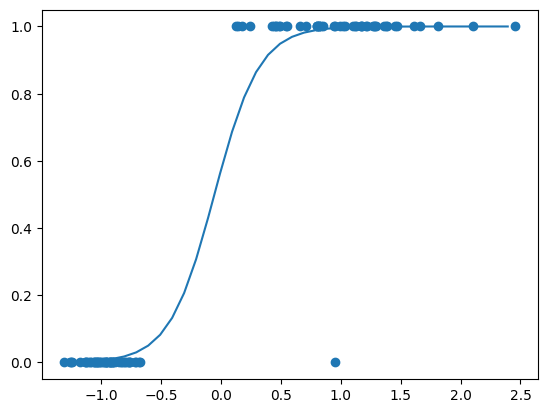

In [19]:
x_vals = np.arange(X.min(), X.max(), 0.1)
r = regression(x_vals, clf.coef_[0][0], clf.intercept_[0])
p_vals = sigmoid(r)

plt.scatter(X, y)
plt.plot(x_vals, p_vals)